In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cmc = pd.read_csv("/Users/Vidya/Documents/Practical_Data_Science/Assignment_2/cmc.txt", sep = ',', names = ["Age_wife", "Education_wife", "Education_husband", "Children", "Religion_wife", "Working_wife", "Occupation_husband", "Standard_of_living_index","Media_exposure", "Contraceptive_method_used"])

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cmc.isnull().sum()

NameError: name 'cmc' is not defined

In [ ]:
cmc.isnull()

In [6]:
cmc.dtypes

Age_wife                     int64
Education_wife               int64
Education_husband            int64
Children                     int64
Religion_wife                int64
Working_wife                 int64
Occupation_husband           int64
Standard_of_living_index     int64
Media_exposure               int64
Contraceptive_method_used    int64
dtype: object

In [7]:
cmc_explore = cmc

### Data Preparation before exploration

#### Converting the numerical values to labels

In [8]:
cmc_explore['Education_wife'].replace(1, 'Low',inplace=True)
cmc_explore['Education_wife'].replace(2, 'Mid-Low',inplace=True)
cmc_explore['Education_wife'].replace(3, 'Mid-High',inplace=True)
cmc_explore['Education_wife'].replace(4, 'High',inplace=True)

cmc_explore['Education_husband'].replace(1, 'Low',inplace=True)
cmc_explore['Education_husband'].replace(2, 'Mid-Low',inplace=True)
cmc_explore['Education_husband'].replace(3, 'Mid-High',inplace=True)
cmc_explore['Education_husband'].replace(4, 'High',inplace=True)

cmc_explore['Religion_wife'].replace(1,'Islam', inplace=True)
cmc_explore['Religion_wife'].replace(0,'Non_Islam', inplace=True)

cmc_explore['Working_wife'].replace(1,'No', inplace=True)
cmc_explore['Working_wife'].replace(0,'Yes', inplace=True)


cmc_explore['Standard_of_living_index'].replace(1,'Low', inplace=True)
cmc_explore['Standard_of_living_index'].replace(2,'Mid-Low', inplace=True)
cmc_explore['Standard_of_living_index'].replace(3,'Mid-High', inplace=True)
cmc_explore['Standard_of_living_index'].replace(4,'High', inplace=True)

cmc_explore['Media_exposure'].replace(1,'Limited Media Exposure', inplace=True)
cmc_explore['Media_exposure'].replace(0,'Good Media Exposure', inplace=True)

cmc_explore['Contraceptive_method_used'].replace(1,'Not Using', inplace=True)
cmc_explore['Contraceptive_method_used'].replace(2,'Long Term Measures', inplace=True)
cmc_explore['Contraceptive_method_used'].replace(3,'Short Term Measures', inplace=True)

In [9]:
cmc_explore.dtypes

Age_wife                      int64
Education_wife               object
Education_husband            object
Children                      int64
Religion_wife                object
Working_wife                 object
Occupation_husband            int64
Standard_of_living_index     object
Media_exposure               object
Contraceptive_method_used    object
dtype: object

In [10]:
cmc_explore['Education_wife'] = cmc_explore['Education_wife'].astype('category')
cmc_explore['Education_husband'] = cmc_explore['Education_husband'].astype('category')
cmc_explore['Religion_wife'] = cmc_explore['Religion_wife'].astype('category')
cmc_explore['Working_wife'] = cmc_explore['Working_wife'].astype('category')
cmc_explore['Standard_of_living_index'] = cmc_explore['Standard_of_living_index'].astype('category')
cmc_explore['Media_exposure'] = cmc_explore['Media_exposure'].astype('category')
cmc_explore['Contraceptive_method_used'] = cmc_explore['Contraceptive_method_used'].astype('category')
cmc_explore.dtypes

Age_wife                        int64
Education_wife               category
Education_husband            category
Children                        int64
Religion_wife                category
Working_wife                 category
Occupation_husband              int64
Standard_of_living_index     category
Media_exposure               category
Contraceptive_method_used    category
dtype: object

In [11]:
description = cmc_explore.describe()
print(description)

       Age_wife  Children  Occupation_husband
count   1473.00   1473.00             1473.00
mean      32.54      3.26                2.14
std        8.23      2.36                0.86
min       16.00      0.00                1.00
25%       26.00      1.00                1.00
50%       32.00      3.00                2.00
75%       39.00      4.00                3.00
max       49.00     16.00                4.00


In [12]:
# Distribution of the wife's age 

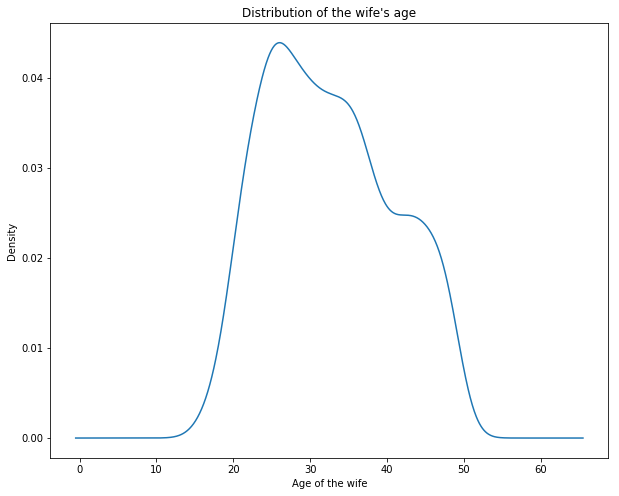

In [13]:
cmc_explore['Age_wife'].plot(kind = 'density', figsize=(10, 8)),
plt.xlabel('Age of the wife'),
plt.title("Distribution of the wife's age")
plt.savefig('density.png')

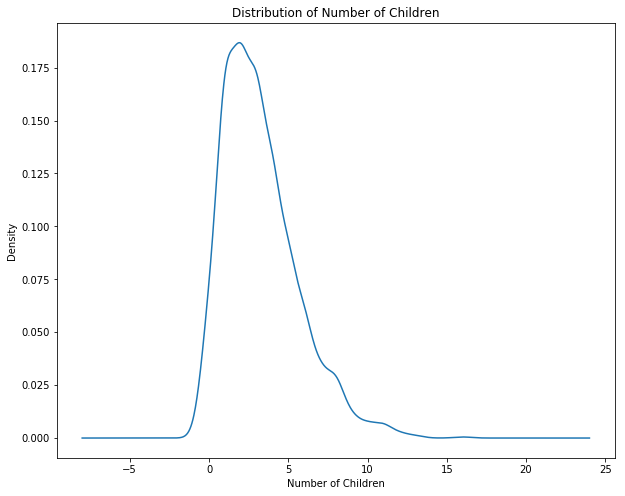

In [14]:
cmc_explore['Children'].plot(kind = 'density', figsize=(10, 8)),
plt.xlabel('Number of Children'),
plt.title("Distribution of Number of Children")
plt.savefig('density1.png')

In [15]:
SOL_Contraceptive = pd.crosstab(index=cmc_explore["Contraceptive_method_used"], columns=cmc_explore["Standard_of_living_index"])

SOL_Contraceptive

Standard_of_living_index,High,Low,Mid-High,Mid-Low
Contraceptive_method_used,,,,
Long Term Measures,204,9,90,30
Not Using,248,80,184,117
Short Term Measures,232,40,157,82


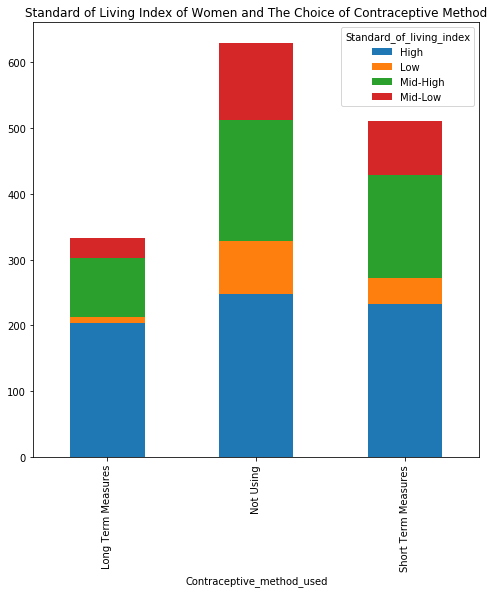

In [16]:
SOL_Contraceptive.plot(kind="bar",figsize=(8,8),stacked=True),plt.title("Standard of Living Index of Women and The Choice of Contraceptive Method")
plt.savefig('SOL.png')

Majority of the women who scored low on the standard of living index were in the group that did not take any contraceptive precautions. There wasn no significant difference in the women who scored high on the standard of living index with respect to their contraceptive methods.

In [17]:
Working_Women_Contraceptive = pd.crosstab(index=cmc_explore["Contraceptive_method_used"],columns=cmc_explore["Working_wife"],normalize='index')
Working_Women_Contraceptive

Working_wife,No,Yes
Contraceptive_method_used,,
Long Term Measures,0.73,0.27
Not Using,0.73,0.27
Short Term Measures,0.78,0.22


(<matplotlib.axes._subplots.AxesSubplot at 0x1a12dfd390>,
 Text(0.5,1,u'Women Who Were Employed and Their choice Of Contraceptive Method'))

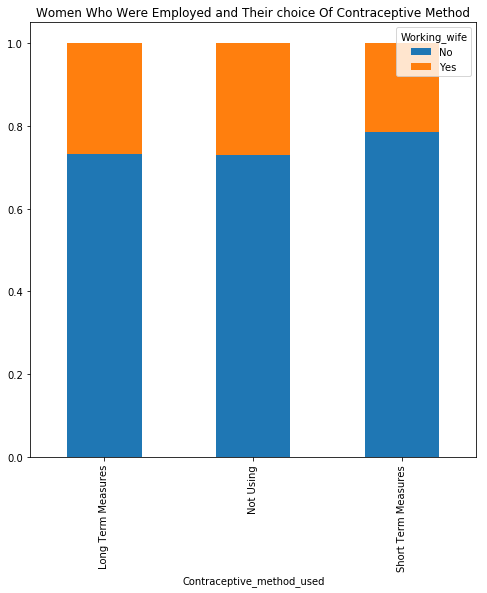

In [18]:
Working_Women_Contraceptive.plot(kind="bar",figsize=(8,8), stacked=True),plt.title("Women Who Were Employed and Their choice Of Contraceptive Method")

#### The above graph shows that women who were not using the contraceptives were mostly in the not working group

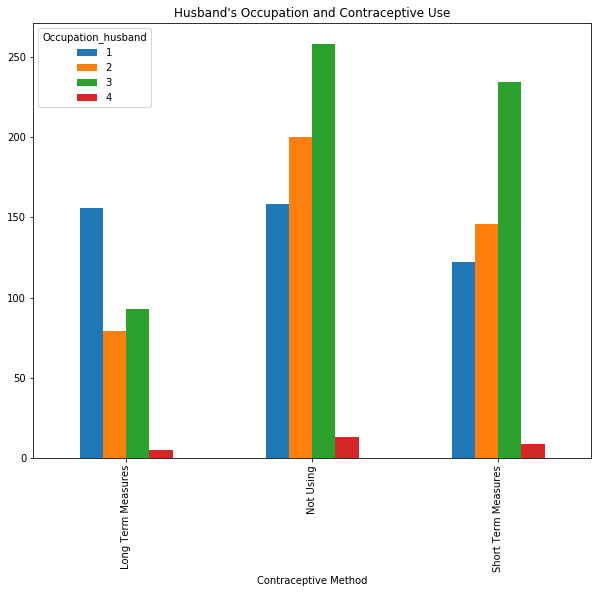

In [19]:
cmc_explore.groupby('Occupation_husband').Contraceptive_method_used.value_counts().unstack(0).plot(kind='bar',figsize=(10, 8))
plt.xlabel("Contraceptive Method")
plt.title("Husband's Occupation and Contraceptive Use")
plt.savefig('Husband.png')

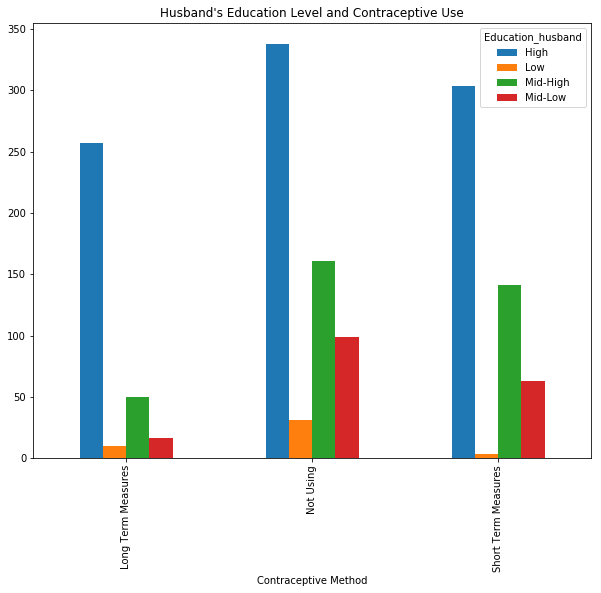

In [20]:
cmc_explore.groupby('Education_husband').Contraceptive_method_used.value_counts().unstack(0).plot(kind='bar',figsize=(10, 8))
plt.xlabel("Contraceptive Method")
plt.title("Husband's Education Level and Contraceptive Use")
plt.savefig('Education.png')

#### The above graph shows that the highest group who did not use any contraceptives was of husband's with high educational qualifications and the least group was the one with low educational qualifications.

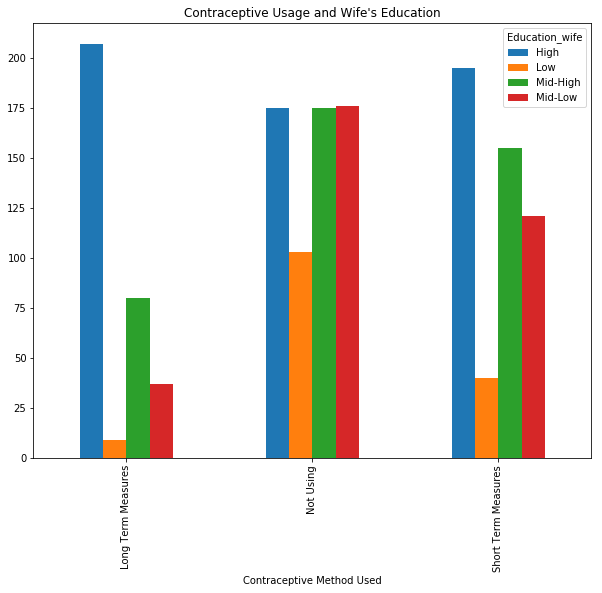

In [21]:
cmc_explore.groupby('Education_wife').Contraceptive_method_used.value_counts().unstack(0).plot(kind='bar',figsize=(10, 8))
plt.title("Contraceptive Usage and Wife's Education"),
plt.xlabel('Contraceptive Method Used')
plt.savefig("Wife's_Education.png")

#### The above graph shows that majority of the women with long term plans were women with high educational backgrounds. The number of women with low educational background were least likely to have a long term measure in place. The number of women using no contraceptive measures was almost equally distributed among the high, mid-high and mid-low educational backgrounds.

In [22]:
# Effect of media exposure on contraceptive usage
cmc_explore['Media_exposure']. value_counts()

Good Media Exposure       1364
Limited Media Exposure     109
Name: Media_exposure, dtype: int64

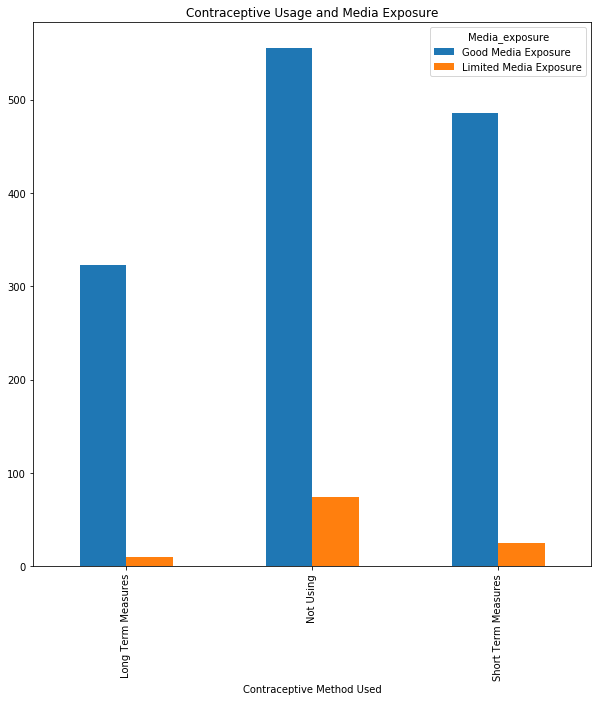

In [23]:
cmc_explore.groupby('Media_exposure').Contraceptive_method_used.value_counts().unstack(0).plot(kind='bar',figsize=(10, 10))
plt.title("Contraceptive Usage and Media Exposure"),
plt.xlabel('Contraceptive Method Used')
plt.savefig('Media.png')

#### The above graph shows that a large portion of the women who used long term contraceptive measures were more exposed to media. The majority of women who were not using contraception had more exposure to media too. The number of women who did not have media exposure was very small compared to media savvy women, but the majority from the-former group had no contraceptive measures in place.

In [24]:
### Relation between Wife's religion on contraceptive method


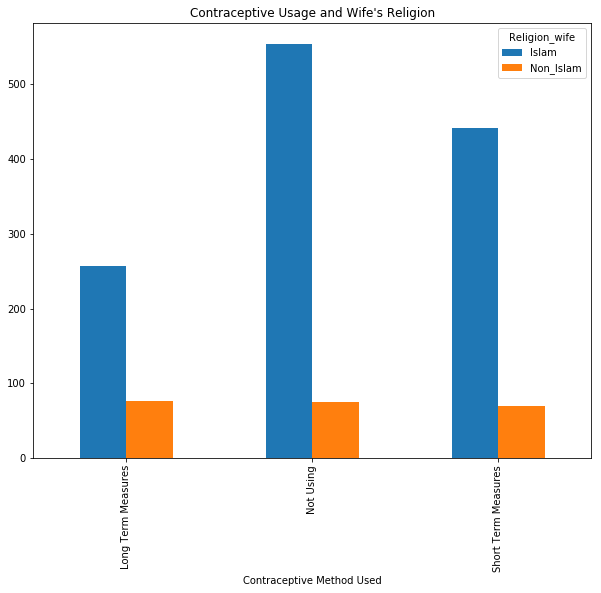

In [25]:
cmc_explore.groupby('Religion_wife').Contraceptive_method_used.value_counts().unstack(0).plot(kind='bar',figsize=(10, 8))
plt.title("Contraceptive Usage and Wife's Religion"),
plt.xlabel('Contraceptive Method Used')
plt.savefig('Religion.png')

#### According to the above graph, majority of the women who chose not to use any contraceptive measures indicated Islam as their religion. The number of women who did not practise Islam were evenly distributed over the 3 contraceptive usage groups.

### Data Preparation before classification
#### Encoding ordinal variable to numeric

In [2]:
cmc = pd.read_csv("/Users/Vidya/Documents/Practical_Data_Science/Assignment_2/cmc.txt", sep = ',', names = ["Age_wife", "Education_wife", "Education_husband", "Children", "Religion_wife", "Working_wife", "Occupation_husband", "Standard_of_living_index","Media_exposure", "Contraceptive_method_used"])

In [3]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Education_wife'], prefix='Ed_Wife')],axis=1)


In [4]:
cmc.drop(['Education_wife'],axis=1, inplace=True)


In [5]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Education_husband'], prefix='Ed_Hus')],axis=1)


In [6]:
cmc.drop(['Education_husband'],axis=1, inplace=True)


In [7]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Religion_wife'], prefix='Rel_wife')],axis=1)


In [8]:
cmc.drop(['Religion_wife'],axis=1, inplace=True)


In [9]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Working_wife'], prefix='Work_wife')],axis=1)


In [10]:
cmc.drop(['Working_wife'],axis=1, inplace=True)


In [11]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Occupation_husband'], prefix='Occ_Hus')],axis=1)


In [12]:
cmc.drop(['Occupation_husband'],axis=1, inplace=True)


In [13]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Media_exposure'], prefix='Med_exp')],axis=1)



In [14]:
cmc.drop(['Media_exposure'], axis = 1, inplace = True)

In [15]:
cmc = pd.concat([cmc,pd.get_dummies(cmc['Standard_of_living_index'], prefix='SOL')],axis=1)


In [16]:
cmc.drop(['Standard_of_living_index'],axis=1, inplace=True)


In [106]:
len(cmc)

1473

In [17]:
cmc.head(10)

,Age_wife,Children,Contraceptive_method_used,Ed_Wife_1,Ed_Wife_2,Ed_Wife_3,Ed_Wife_4,Ed_Hus_1,Ed_Hus_2,Ed_Hus_3,...,Occ_Hus_1,Occ_Hus_2,Occ_Hus_3,Occ_Hus_4,Med_exp_0,Med_exp_1,SOL_1,SOL_2,SOL_3,SOL_4
0,24,3,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,45,10,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,43,7,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3,42,9,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,36,8,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
5,19,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6,38,6,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7,21,1,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
8,27,3,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
9,45,8,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [18]:
description = cmc.describe()
print(description)

          Age_wife     Children  Contraceptive_method_used    Ed_Wife_1  \
count  1473.000000  1473.000000                1473.000000  1473.000000   
mean     32.538357     3.261371                   1.919891     0.103191   
std       8.227245     2.358549                   0.876376     0.304311   
min      16.000000     0.000000                   1.000000     0.000000   
25%      26.000000     1.000000                   1.000000     0.000000   
50%      32.000000     3.000000                   2.000000     0.000000   
75%      39.000000     4.000000                   3.000000     0.000000   
max      49.000000    16.000000                   3.000000     1.000000   

         Ed_Wife_2    Ed_Wife_3    Ed_Wife_4     Ed_Hus_1     Ed_Hus_2  \
count  1473.000000  1473.000000  1473.000000  1473.000000  1473.000000   
mean      0.226748     0.278344     0.391718     0.029871     0.120842   
std       0.418871     0.448336     0.488300     0.170289     0.326054   
min       0.000000     0.000

## Partitioning the dataset

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [20]:
cmc.head(10)

,Age_wife,Children,Contraceptive_method_used,Ed_Wife_1,Ed_Wife_2,Ed_Wife_3,Ed_Wife_4,Ed_Hus_1,Ed_Hus_2,Ed_Hus_3,...,Occ_Hus_1,Occ_Hus_2,Occ_Hus_3,Occ_Hus_4,Med_exp_0,Med_exp_1,SOL_1,SOL_2,SOL_3,SOL_4
0,24,3,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,45,10,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,43,7,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
3,42,9,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,36,8,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
5,19,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6,38,6,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7,21,1,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
8,27,3,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
9,45,8,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [21]:
#cmc_features = cmc.values[0:1, 3:24]


In [22]:
cmc_target = cmc.values[:,2]

In [23]:
cmc_feature = cmc.drop('Contraceptive_method_used', axis=1)

In [24]:
feature_names = cmc_feature.columns[0:24]

In [25]:



cmc_features = cmc_feature.as_matrix()


In [26]:
len(cmc_features)

1473

In [27]:
type(cmc_features)

numpy.ndarray

In [28]:
cmc_features

array([[24,  3,  0, ...,  0,  1,  0],
       [45, 10,  1, ...,  0,  0,  1],
       [43,  7,  0, ...,  0,  0,  1],
       ...,
       [39,  8,  0, ...,  0,  0,  1],
       [33,  4,  0, ...,  1,  0,  0],
       [17,  1,  0, ...,  0,  0,  1]])

In [29]:
type(cmc_target)

numpy.ndarray

In [30]:
cmc_target

array([1, 1, 1, ..., 3, 3, 3])

#### Generate train and test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cmc_features, cmc_target, test_size = 0.30, random_state = 0)

In [32]:
X_train

array([[40,  8,  0, ...,  1,  0,  0],
       [47,  6,  1, ...,  0,  0,  0],
       [28,  1,  0, ...,  0,  1,  0],
       ...,
       [31,  4,  0, ...,  0,  1,  0],
       [29,  4,  0, ...,  1,  0,  0],
       [40,  2,  0, ...,  0,  0,  1]])

In [33]:
X_train.shape

(1031, 24)

In [34]:
y_train

array([1, 1, 3, ..., 2, 2, 3])

In [35]:
y_train.shape

(1031,)

In [36]:
X_test

array([[27,  0,  0, ...,  0,  1,  0],
       [36,  3,  0, ...,  0,  1,  0],
       [39,  3,  0, ...,  0,  0,  1],
       ...,
       [24,  1,  0, ...,  0,  1,  0],
       [47,  5,  0, ...,  0,  0,  1],
       [31,  4,  0, ...,  0,  1,  0]])

In [37]:
X_test.shape

(442, 24)

In [38]:
y_test

array([1, 1, 2, 3, 2, 3, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 3,
       1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 2, 1,
       1, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 1, 3,
       1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 3, 3, 2, 3, 3, 1, 1, 2, 1,
       2, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 3, 3,
       1, 1, 3, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 2, 2, 3, 2, 3, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 2,
       1, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 3, 3, 1, 2, 2, 1, 3, 1, 1, 3,
       2, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 2, 3,
       2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 1, 1, 1, 3, 3,
       2, 3, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 3, 1, 3,

In [39]:
y_test.shape

(442,)

# Model Fitting

### Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


#### Model with fixed parameters

In [253]:

tree_clf = DecisionTreeClassifier(criterion='gini', min_samples_split= 10, max_depth=5,
            max_features=8, min_samples_leaf=4,
            random_state=10, splitter='best')



In [254]:



tree_fit = tree_clf.fit(X_train, y_train)



In [255]:
# Score the predicted output from model on the test data against 

y_pred = tree_fit.predict(X_test)


In [256]:
#y_pred

In [257]:
from sklearn.metrics import accuracy_score

print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

('Accuracy is ', 42.76018099547511)


In [258]:
pd.crosstab(y_test, y_pred, rownames=['Actual Contraceptive Choice'], colnames=['Predicted Contraceptive Choice'])

Predicted Contraceptive Choice,1,2,3
Actual Contraceptive Choice,,,
1,115,1,65
2,51,0,66
3,70,0,74


In [259]:
error_rate_tree = (y_pred != y_test).mean()


In [260]:
error_rate_tree

0.5723981900452488

In [261]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[115   1  65]
 [ 51   0  66]
 [ 70   0  74]]


In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          1       0.49      0.64      0.55       181
          2       0.00      0.00      0.00       117
          3       0.36      0.51      0.42       144

avg / total       0.32      0.43      0.36       442



#### Grid Search for Decision tree

In [283]:
from sklearn.model_selection import cross_val_score

from sklearn.grid_search import GridSearchCV


In [ ]:

max_depth = list(range(1,20))
#max_features = list(range(1,20))
#min_samples_split = list(range(2,100))
min_samples_leaf = list(range(1,20))


param_grid = dict( 
                    max_depth = max_depth, 
                    min_samples_leaf = min_samples_leaf, 
                    #min_samples_split = min_samples_split
)


grid = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy')




In [ ]:
grid.fit(cmc_features, cmc_target)

#grid_fit = grid.fit(X_train, y_train)

In [425]:
print(grid.best_params_)

print(grid.best_estimator_)

{'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')


In [277]:
grid_tree_clf = grid.best_estimator_


In [280]:
grid_tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
gridtree_y_pred = grid_tree_clf.predict(X_test)


In [298]:
accuracy_score(gridtree_y_pred, y_test)*100

58.82352941176471

In [282]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gridtree_y_pred))


             precision    recall  f1-score   support

          1       0.61      0.75      0.67       181
          2       0.59      0.44      0.51       117
          3       0.55      0.51      0.53       144

avg / total       0.59      0.59      0.58       442



In [287]:
error_rate_gridtree = (gridtree_y_pred != y_test).mean()


In [339]:
error_rate_gridtree

0.4117647058823529

In [340]:
print ("Accuracy is ", accuracy_score(y_test,gridtree_y_pred)*100)

('Accuracy is ', 58.82352941176471)


In [301]:
cm_gridtree = confusion_matrix(y_test, gridtree_y_pred)
print(cm_gridtree)

[[135  10  36]
 [ 41  52  24]
 [ 45  26  73]]


In [302]:
pd.crosstab(y_test, gridtree_y_pred, rownames=['Actual Contraceptive Choice'], colnames=['Predicted Contraceptive Choice'])

Predicted Contraceptive Choice,1,2,3
Actual Contraceptive Choice,,,
1,135,10,36
2,41,52,24
3,45,26,73


In [278]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

#tree.export_graphviz(tree_clf, out_file='/Users/Vidya/Documents/Practical_Data_Science/Assignment_2/tree.dot', feature_names=cmc_features.feature_names, class_names = cmc_target.target_names)
tree.export_graphviz(grid_tree_clf, 
                     out_file='/Users/Vidya/Documents/Practical_Data_Science/Assignment_2/tree.dot',
                     class_names = ['No Contraception','Short-Term Contraception','Long-Term Contraception'],
                     feature_names=feature_names)
                   
                    

In [279]:
from subprocess import call

call(['dot', '-T', 'png', '/Users/Vidya/Documents/Practical_Data_Science/Assignment_2/tree.dot', '-o', 'tree.png'])

0

## KNN classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV


/Users/Vidya/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Vidya/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Grid Search for parameter tuning

In [90]:
k_range = list(range(1, 100))

weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors=k_range, weights= weight_options)
print(param_grid)



{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']}


In [91]:
knn = KNeighborsClassifier(n_neighbors=k_range)


In [92]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


In [108]:
grid.fit(cmc_features, cmc_target)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1,
           n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4... 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           p=2, weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, s

In [94]:
grid.grid_scores_

[mean: 0.43720, std: 0.03618, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.43720, std: 0.03618, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.45418, std: 0.02368, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.44535, std: 0.04197, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.48948, std: 0.04006, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.47862, std: 0.04060, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.48744, std: 0.03560, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.48744, std: 0.03232, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.49423, std: 0.03212, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.49084, std: 0.03718, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.50305, std: 0.03591, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.49151, std: 0.02737, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.52071, std: 0.02972, para

In [97]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)


[0.43720298710115413, 0.43720298710115413, 0.45417515274949083, 0.4453496266123557, 0.4894772572980312, 0.4786150712830957, 0.4874405974202308, 0.4874405974202308, 0.4942294636795655, 0.4908350305498982, 0.5030549898167006, 0.49151391717583165, 0.5207060420909708, 0.49355057705363203, 0.5139171758316361, 0.49355057705363203, 0.5234215885947047, 0.5023761031907671, 0.5118805159538357, 0.4989816700610998, 0.5329260013577732, 0.5159538357094365, 0.5308893414799728, 0.5098438560760353, 0.5356415478615071, 0.5084860828241684, 0.5295315682281059, 0.5166327223353699, 0.5431093007467753, 0.5274949083503055, 0.5336048879837068, 0.5247793618465716, 0.5363204344874406, 0.5241004752206382, 0.5349626612355737, 0.5241004752206382, 0.5403937542430414, 0.526816021724372, 0.5471826205023761, 0.5213849287169042, 0.5437881873727087, 0.5356415478615071, 0.5465037338764427, 0.5254582484725051, 0.548540393754243, 0.5329260013577732, 0.5465037338764427, 0.5336048879837068, 0.548540393754243, 0.53156822810590

In [98]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.549898167006
{'n_neighbors': 32, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=32, p=2,
           weights='uniform')


In [99]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(cmc_features, cmc_target)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1,
           n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4... 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           p=2, weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, s

In [100]:
grid.grid_scores_


[mean: 0.43720, std: 0.03618, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.43720, std: 0.03618, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.45418, std: 0.02368, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.44535, std: 0.04197, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.48948, std: 0.04006, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.47862, std: 0.04060, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.48744, std: 0.03560, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.48744, std: 0.03232, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.49423, std: 0.03212, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.49084, std: 0.03718, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.50305, std: 0.03591, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.49151, std: 0.02737, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.52071, std: 0.02972, para

In [101]:
print(grid.best_score_)
print(grid.best_params_)

0.549898167006
{'n_neighbors': 32, 'weights': 'uniform'}


In [102]:
gs_predict_knn = grid.predict(X_test)

In [103]:
cm_knn = confusion_matrix(y_test,gs_predict_knn)

In [104]:
cm_knn

array([[119,  22,  40],
       [ 28,  52,  37],
       [ 39,  27,  78]])

In [109]:
print(classification_report(y_test, gs_predict_knn))

             precision    recall  f1-score   support

          1       0.64      0.66      0.65       181
          2       0.51      0.44      0.48       117
          3       0.50      0.54      0.52       144

avg / total       0.56      0.56      0.56       442



In [57]:
pd.crosstab(y_test, gs_predict_knn, rownames=['Actual Contraceptive Choice'], colnames=['Predicted Contraceptive Choice'])

Predicted Contraceptive Choice,1,2,3
Actual Contraceptive Choice,,,
1,119,22,40
2,28,52,37
3,39,27,78


In [58]:
error_rate_knn = (gs_predict_knn != y_test).mean()


In [61]:
print(error_rate_knn)

0.43665158371040724


In [62]:
from sklearn.metrics import accuracy_score


In [74]:
print ("Accuracy is ", accuracy_score(y_test,gs_predict_knn)*100)

('Accuracy is ', 56.334841628959275)


#### Test

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print accuracy_score(y_test, pred)

0.46153846153846156


In [66]:
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 17


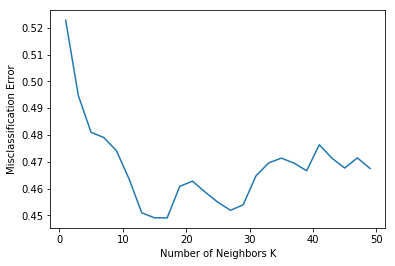

In [67]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [73]:
knn = KNeighborsClassifier(n_neighbors=17)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print accuracy_score(y_test, pred)

0.5113122171945701


### Random Forest

In [435]:
from sklearn.ensemble import RandomForestClassifier

#### Model with fixed parameters

In [357]:
clf_random = RandomForestClassifier(n_jobs = 1, n_estimators=100, max_features = 3, max_depth=5, min_samples_leaf = 2, random_state=0)

In [358]:
clf_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [359]:
y_pred_random = clf_random.predict(X_test)


In [360]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_random)


0.5090497737556561

In [361]:
error_rate_random = (y_pred_random != y_test).mean()


In [362]:
error_rate_random

0.49095022624434387

In [363]:
cm_random = confusion_matrix(y_test, y_pred_random)

In [364]:
cm_random

array([[124,   4,  53],
       [ 35,  21,  61],
       [ 59,   5,  80]])

In [365]:
pd.crosstab(y_test, y_pred_random, rownames=['Actual Contraceptive Choice'], colnames=['Predicted Contraceptive Choice'])

Predicted Contraceptive Choice,1,2,3
Actual Contraceptive Choice,,,
1,124,4,53
2,35,21,61
3,59,5,80


In [366]:
print(classification_report(y_test, y_pred_random))

             precision    recall  f1-score   support

          1       0.57      0.69      0.62       181
          2       0.70      0.18      0.29       117
          3       0.41      0.56      0.47       144

avg / total       0.55      0.51      0.48       442



#### Grid Search for tuning parameters

In [410]:
clf_random = RandomForestClassifier()

In [411]:
max_depth = list(range(1,20))

min_samples_leaf = list(range(1,20))

param_grid = dict( 
                    max_depth = max_depth, 
                    min_samples_leaf = min_samples_leaf
                )

In [422]:
grid_search = GridSearchCV(estimator = clf_random, param_grid = param_grid, 
                          cv=10, scoring='accuracy')

In [423]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [424]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 14}

In [415]:
print(grid_search.best_params_)

print(grid_search.best_estimator_)

{'max_depth': 8, 'min_samples_leaf': 16}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [428]:
grid_random_clf = grid_search.best_estimator_


In [429]:
gridRandom_y_pred = grid_random_clf.predict(X_test)


In [430]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gridRandom_y_pred))


             precision    recall  f1-score   support

          1       0.55      0.71      0.62       181
          2       0.61      0.23      0.34       117
          3       0.43      0.49      0.46       144

avg / total       0.53      0.51      0.49       442



In [431]:
error_rate_gridRandom = (gridRandom_y_pred != y_test).mean()


In [432]:
error_rate_gridRandom

0.48868778280542985

In [433]:
pd.crosstab(y_test, gridRandom_y_pred, rownames=['Actual Contraceptive Choice'], colnames=['Predicted Contraceptive Choice'])

Predicted Contraceptive Choice,1,2,3
Actual Contraceptive Choice,,,
1,129,5,47
2,44,27,46
3,62,12,70
